# Unit 5 - Financial Planning

In [35]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [36]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [37]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [38]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [39]:
# Fetch current BTC price
btc_data = requests.get(btc_url)

# Fetch current ETH price
eth_data = requests.get(eth_url)

# Compute current value of my crpto
import json
btc_data_json = btc_data.json()
my_btc_value = (btc_data_json['data']['1']['quotes']['USD']['price']) * 1.2
eth_data_json = eth_data.json()
my_eth_value = (eth_data_json['data']['1027']['quotes']['USD']['price']) * 5.3

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $52119.60
The current value of your 5.3 ETH is $17012.89


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [40]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [41]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [61]:
# Format current date as ISO format
start_date = pd.Timestamp("2020-05-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-04-06", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_ticker = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000
).df

AGG = df_ticker[df_ticker['symbol']=='AGG'].drop('symbol', axis=1)

SPY = df_ticker[df_ticker['symbol']=='SPY'].drop('symbol', axis=1)

df_ticker = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])
df_ticker.index = df_ticker.index.date


# Preview DataFrame
df_ticker.head()

AGG                                                   \
              open      high       low   close   volume trade_count   
2020-05-01  116.97  117.0998  116.6775  116.87  6099893       24395   
2020-05-04  116.89  117.0900  116.8700  116.97  3684081       15545   
2020-05-05  116.96  116.9700  116.8100  116.88  4612127       15150   
2020-05-06  116.44  116.7100  116.3000  116.41  6394949       20233   
2020-05-07  116.61  116.7700  116.4200  116.77  3788632       15964   

                           SPY                                         \
                  vwap    open      high       low   close     volume   
2020-05-01  116.846123  285.16  290.6572  281.5200  282.79  125180028   
2020-05-04  116.960599  280.46  283.9000  279.1300  283.57   80883545   
2020-05-05  116.879635  286.66  289.2500  283.7134  286.19   79569939   
2020-05-06  116.426742  288.01  288.4600  283.7800  284.25   74234197   
2020-05-07  116.641830  287.79  289.7800  287.1300  287.68   75250852   

                                    
           trade_count        vwap  
2020-05-01      639987  284.092832  
2020-05-04      460682  281.765323  
2020-05-05      459764  287.400201  
2020-05-06      436223  286.083037  
2020-05-07      422689  287.989937

In [62]:
# Pick AGG and SPY close prices
agg_close_price = (df_ticker.iloc[-1]["AGG"]["close"])
spy_close_price = (df_ticker.iloc[-1]["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current SPY closing price: ${spy_close_price}")
print(f"Current AGG closing price: ${agg_close_price}")

Current SPY closing price: $446.52
Current AGG closing price: $105.49


In [44]:
# Compute the current value of shares
# YOUR CODE HERE!
my_spy_value = spy_close_price * 50
my_agg_value = agg_close_price * 200
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $22326.00
The current value of your 200 AGG shares is $21098.00


### Savings Health Analysis

In [45]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
data_combined = {'amount':[(my_btc_value + my_eth_value), (my_spy_value + my_agg_value)]}

# Create savings DataFrame
df_savings = pd.DataFrame(data_combined, index =['crypto',
                                'shares'])

# Display savings DataFrame
display(df_savings)

,amount
crypto,69132.494
shares,43424.000


<AxesSubplot:title={'center':'Stock Savings'}, ylabel='amount'>

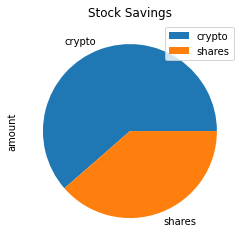

In [46]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Stock Savings")

In [47]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total = sum(df_savings['amount']) 

# Validate saving health
if total > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund.")
elif total == emergency_fund:
    print("Congratulations on reaching your financial goal!")
else:
    print(f"You are ${(emergency_fund-total)}")

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [114]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp("2017-04-06", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-04-06", tz="America/New_York").isoformat()

In [120]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
tickers = ["AGG", "SPY"]
timeframe = "1Day"
df_stock_data = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=10000
).df
AGG = df_stock_data[df_stock_data['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_stock_data[df_stock_data['symbol']=='SPY'].drop('symbol', axis=1)
df_stock_data = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])
df_stock_data.index = df_stock_data.index.date
# Display sample data
df_stock_data.head()

AGG                                                             \
              open    high       low   close   volume trade_count        vwap   
2017-04-06  108.64  108.71  108.4800  108.68  1725301        7746  108.588276   
2017-04-07  108.80  108.89  108.4200  108.44  1783599        8534  108.645684   
2017-04-10  108.53  108.65  108.4901  108.58  1903768       12236  108.566615   
2017-04-11  108.79  108.98  108.7500  108.89  2200830       11420  108.874603   
2017-04-12  108.93  109.20  108.8900  109.13  2432965       10372  109.013960   

               SPY                                                              
              open     high      low   close    volume trade_count        vwap  
2017-04-06  234.96  236.040  234.425  235.44  69135757      244996  235.287745  
2017-04-07  235.18  236.000  234.640  235.20  74412311      235941  235.290964  
2017-04-10  235.36  236.255  234.730  235.34  67615302      211985  235.487358  
2017-04-11  234.90  235.180  233.340  235.06  88045276      306525  234.499802  
2017-04-12  234.80  234.960  233.770  234.03  81864436      262862  234.298297

In [121]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_even_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.4,.6],
    num_simulation = 500,
    num_trading_days = 252*30
)



In [122]:
# Printing the simulation input data
MC_even_dist.portfolio_data.head()

AGG                                                             \
              open    high       low   close   volume trade_count        vwap   
2017-04-06  108.64  108.71  108.4800  108.68  1725301        7746  108.588276   
2017-04-07  108.80  108.89  108.4200  108.44  1783599        8534  108.645684   
2017-04-10  108.53  108.65  108.4901  108.58  1903768       12236  108.566615   
2017-04-11  108.79  108.98  108.7500  108.89  2200830       11420  108.874603   
2017-04-12  108.93  109.20  108.8900  109.13  2432965       10372  109.013960   

                            SPY                                      \
           daily_return    open     high      low   close    volume   
2017-04-06          NaN  234.96  236.040  234.425  235.44  69135757   
2017-04-07    -0.002208  235.18  236.000  234.640  235.20  74412311   
2017-04-10     0.001291  235.36  236.255  234.730  235.34  67615302   
2017-04-11     0.002855  234.90  235.180  233.340  235.06  88045276   
2017-04-12     0.002204  234.80  234.960  233.770  234.03  81864436   

                                                 
           trade_count        vwap daily_return  
2017-04-06      244996  235.287745          NaN  
2017-04-07      235941  235.290964    -0.001019  
2017-04-10      211985  235.487358     0.000595  
2017-04-11      306525  234.499802    -0.001190  
2017-04-12      262862  234.298297    -0.004382

In [123]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\derpm\Desktop\Fintech\Git\Gitlab\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997514,0.980399,0.993122,0.989964,1.002002,0.995598,1.014937,1.011524,1.000722,1.007492,...,0.986891,1.018677,0.994072,1.001893,0.997550,0.999478,1.004436,0.999114,0.999143,1.010477
2,0.989379,0.984181,0.993396,0.991242,1.013934,1.003924,1.017070,1.018751,0.992396,1.008321,...,0.992252,1.025085,0.996132,1.002557,0.996889,0.998483,1.003206,1.004189,1.008521,1.013813
3,0.987298,0.975821,0.998922,0.995555,1.007920,0.989627,1.020658,1.022351,0.991639,0.994623,...,0.989896,1.022753,1.008900,1.001692,1.004193,1.001193,1.002948,1.013413,1.013749,1.012701
4,0.974976,0.983628,0.995311,1.006438,1.001958,0.990937,1.025541,1.016797,1.002012,0.981295,...,0.985658,1.021082,1.000750,1.002520,0.993655,1.006578,1.009543,1.019730,1.013364,1.019374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,32.302252,19.899324,9.301311,5.936573,16.889678,12.357873,8.542533,12.892994,4.873819,3.522929,...,9.699166,8.103805,6.558159,8.851679,12.059449,8.198516,8.607477,10.652009,6.833021,22.625286
7557,31.920628,19.982515,9.282512,5.952758,16.748305,12.189878,8.576444,12.875414,4.819255,3.491310,...,9.739125,8.062114,6.584914,8.757882,12.202345,8.182839,8.348187,10.727832,6.899743,22.658501
7558,31.734494,19.809066,9.140495,6.070083,16.725736,12.267234,8.669169,13.029585,4.783855,3.498551,...,9.533768,8.037552,6.566600,8.762526,12.210055,8.110906,8.262698,10.694709,6.948524,22.650382
7559,31.934884,19.879312,9.101430,6.128476,16.930408,12.396325,8.588458,13.014906,4.767390,3.514623,...,9.483366,8.124698,6.565626,8.851908,12.234001,8.083231,8.361743,10.725249,6.929478,22.176752


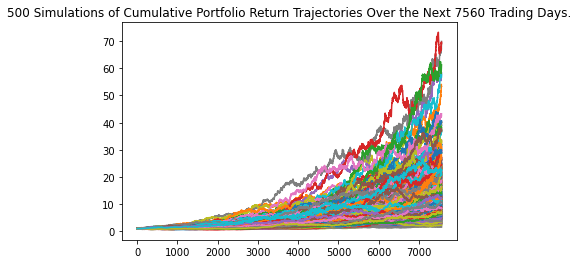

In [124]:
# Plot simulation outcomes
line_plot = MC_even_dist.plot_simulation()

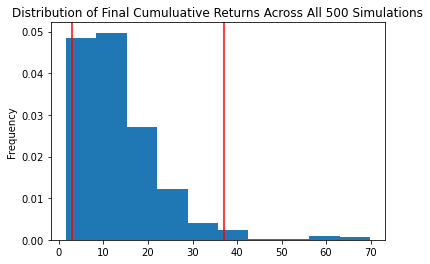

In [125]:
# Plot probability distribution and confidence intervals
dist_plot = MC_even_dist.plot_distribution()

### Retirement Analysis

In [126]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print(even_tbl)

count           500.000000
mean             13.469972
std               9.392271
min               1.537986
25%               7.353502
50%              10.981612
75%              17.342121
max              69.898601
95% CI Lower      3.015543
95% CI Upper     37.064724
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [128]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(even_tbl[8]*initial_investment,2)
ci_upper = round(even_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $60310.86 and $741294.48


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [129]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(even_tbl[8]*initial_investment,2)
ci_upper = round(even_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $90466.3 and $1111941.73
